In [3]:
import pandas as pd
import matplotlib as plt
import numpy as np

In [4]:
df = pd.read_csv(r"F:/Python Projects/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Data Preprocessing:

1.Handle missing or anomalous data.
2.Convert categorical variables (sex, smoker, region) into numerical formats using encoding techniques (e.g., one-hot encoding).
3.Normalize/standardize numerical features if required.

In [9]:
# Displaying the first few rows of the dataset to understand its structure
insurance_data = df 
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
# Identifying and removing duplicate rows
duplicate_rows = insurance_data.duplicated().sum()
insurance_data_cleaned = insurance_data.drop_duplicates()

duplicate_rows, insurance_data_cleaned.shape

(1, (1337, 7))

In [11]:
# One-hot encoding for categorical variables
categorical_columns = ['sex', 'smoker', 'region']
insurance_data_encoded = pd.get_dummies(insurance_data_cleaned, columns=categorical_columns)

# Displaying the first few rows of the modified dataset to verify the encoding
insurance_data_encoded.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [12]:
# Basic statistics for numerical features
numerical_features = ['age', 'bmi', 'children', 'charges']
insurance_data_encoded[numerical_features].describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [14]:
from sklearn.preprocessing import StandardScaler

# Standardizing the numerical features
scaler = StandardScaler()
insurance_data_encoded[numerical_features] = scaler.fit_transform(insurance_data_encoded[numerical_features])

# Displaying the first few rows of the dataset after standardization
insurance_data_encoded.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.440418,-0.453160,-0.909234,0.297857,True,False,False,True,False,False,False,True
1,-1.511647,0.509422,-0.079442,-0.954381,False,True,True,False,False,False,True,False
2,-0.799350,0.383155,1.580143,-0.729373,False,True,True,False,False,False,True,False
3,-0.443201,-1.305052,-0.909234,0.719104,False,True,True,False,False,True,False,False
4,-0.514431,-0.292456,-0.909234,-0.777499,False,True,True,False,False,True,False,False


# Exploratory Data Analysis (EDA):

1.Analyze the distribution of key variables (e.g., age, bmi, charges).

2.Investigate relationships between features and the target variable (charges).

3.Identify potential outliers or influential points.

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


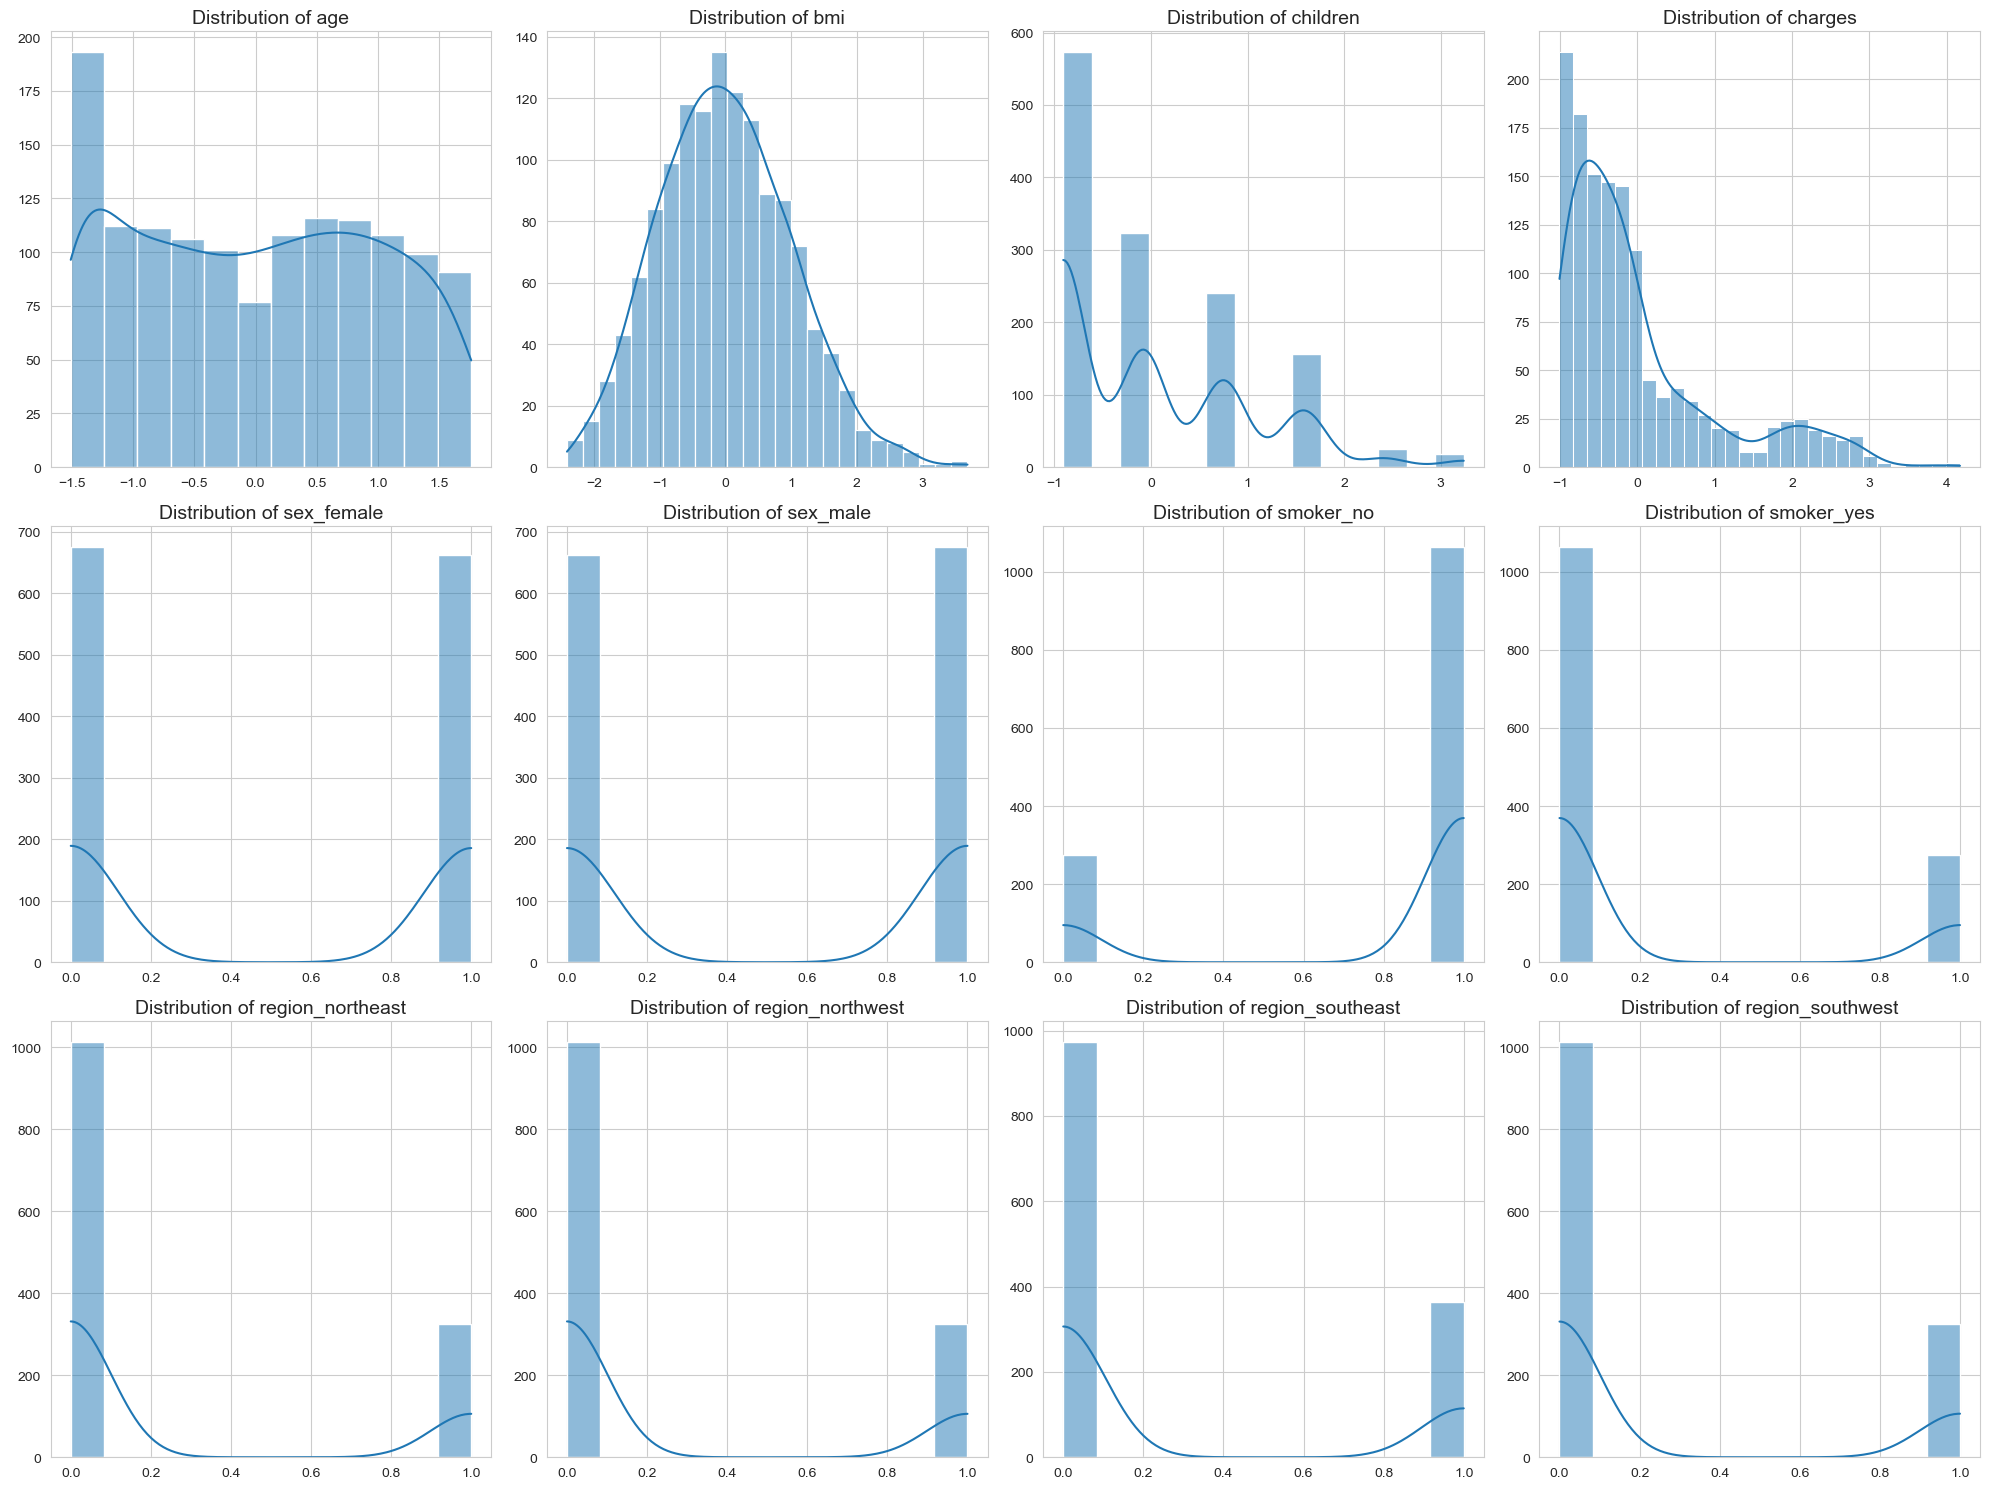

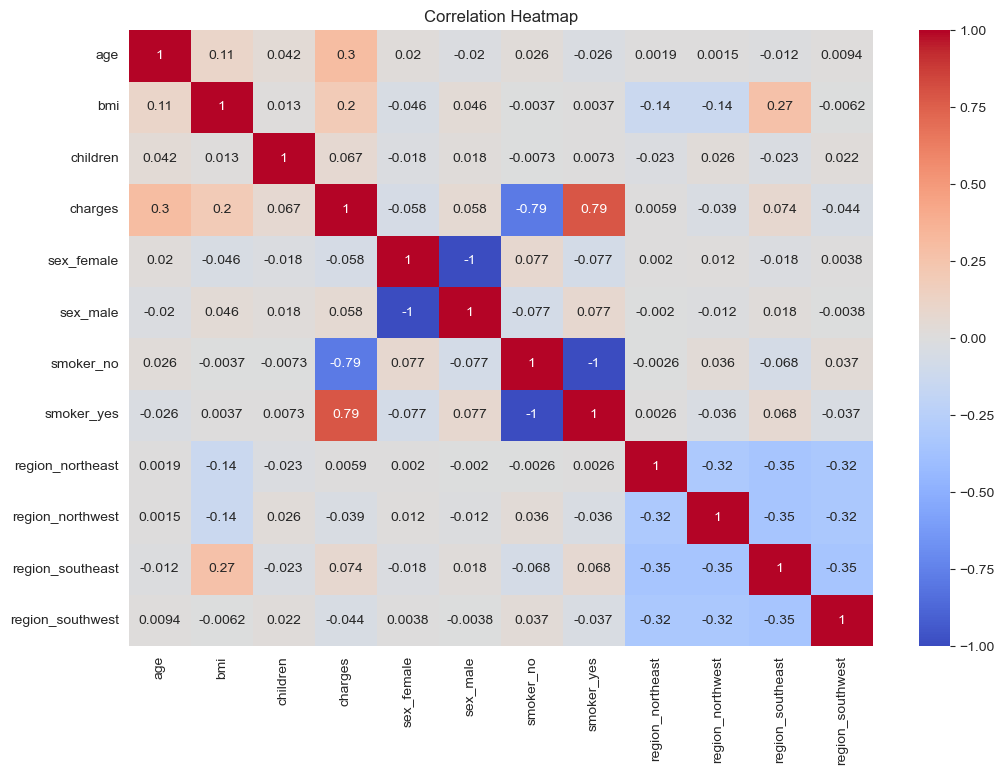

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Analyzing the Distribution of All Variables
# Histograms for each variable
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
axes = axes.flatten()  # Flattening the axes array for easy indexing

# Plotting histograms for each column
for i, col in enumerate(insurance_data_encoded.columns):
    sns.histplot(insurance_data_encoded[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

# Heatmap for Correlation
plt.figure(figsize=(12, 8))
correlation_matrix = insurance_data_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

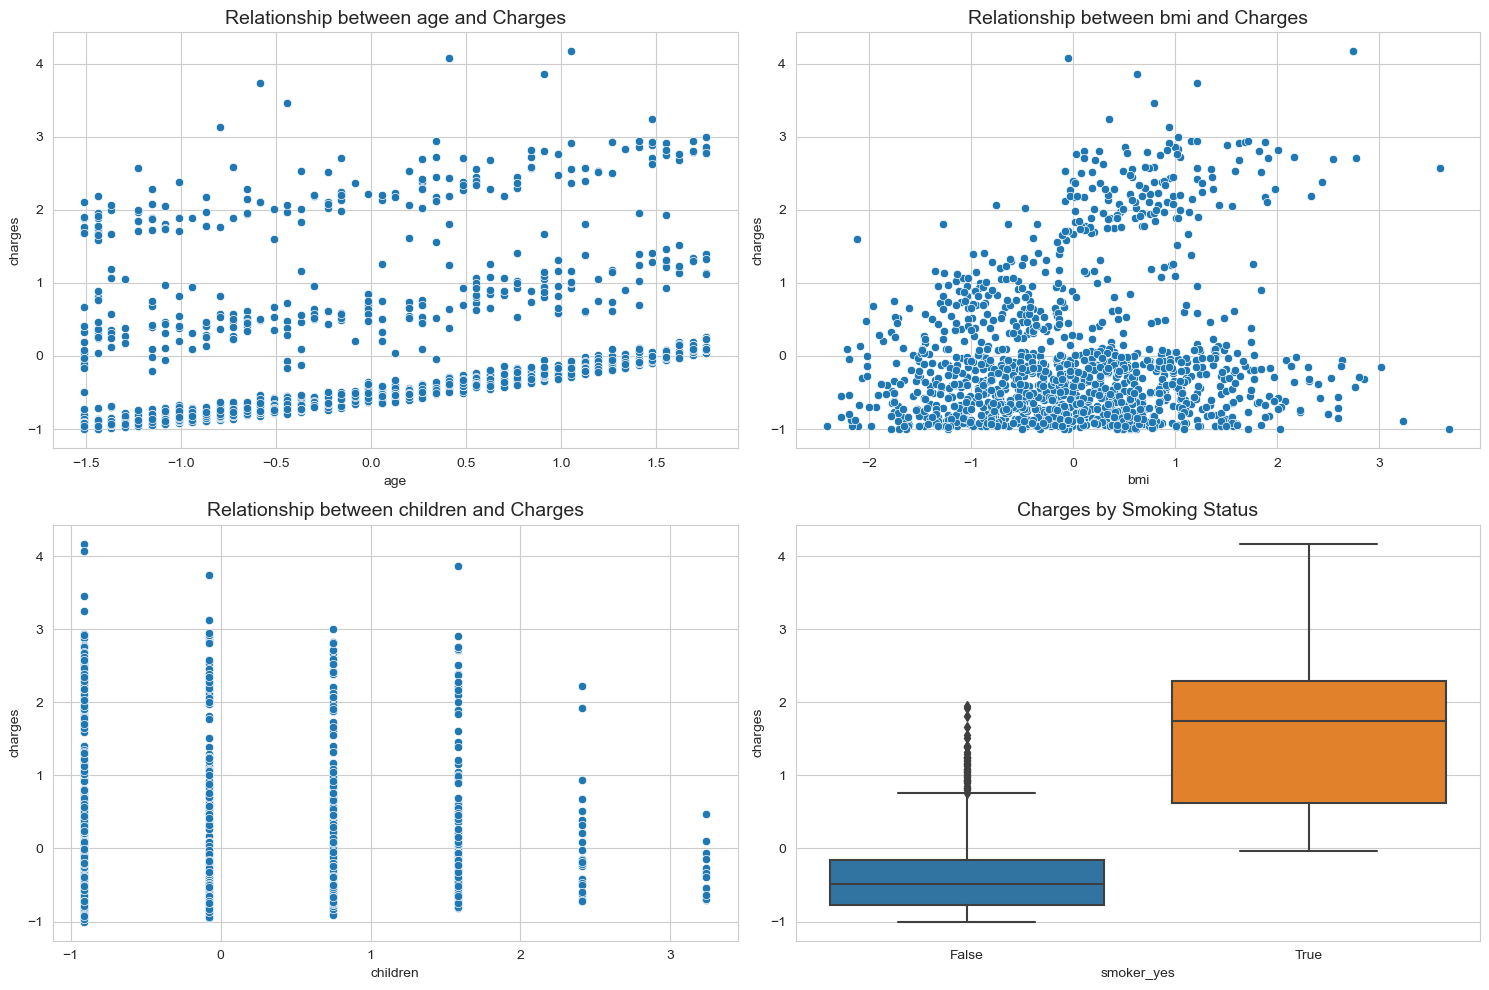

In [16]:
# Investigating Relationships Between Features and the Target Variable 'charges'
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()  # Flattening the axes array for easy indexing

# Scatter plots for continuous variables
continuous_vars = ['age', 'bmi', 'children']
for i, var in enumerate(continuous_vars):
    sns.scatterplot(data=insurance_data_encoded, x=var, y='charges', ax=axes[i])
    axes[i].set_title(f'Relationship between {var} and Charges', fontsize=14)

# Boxplot for the categorical variable 'smoker_yes' as it shows strong correlation
sns.boxplot(data=insurance_data_encoded, x='smoker_yes', y='charges', ax=axes[3])
axes[3].set_title('Charges by Smoking Status', fontsize=14)

plt.tight_layout()
plt.show()

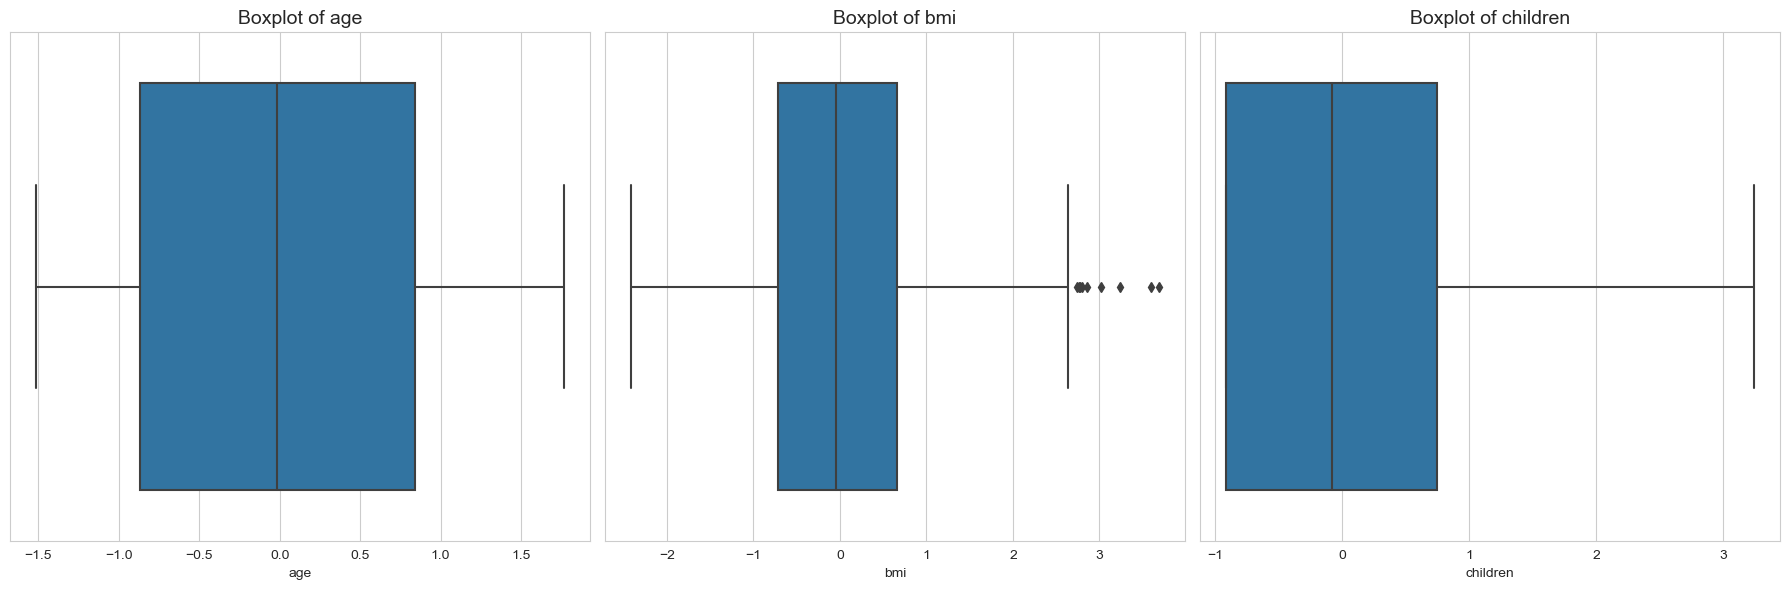

In [17]:
# Identifying Potential Outliers through Boxplots for Continuous Variables
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Creating boxplots
for i, var in enumerate(continuous_vars):
    sns.boxplot(data=insurance_data_encoded, x=var, ax=axes[i])
    axes[i].set_title(f'Boxplot of {var}', fontsize=14)

plt.tight_layout()
plt.show()

# Model Development:

1.Split the dataset into training and testing sets.

2.Implement a linear regression model.

3.Evaluate model performance using appropriate metrics (e.g., R-squared, Mean Squared Error).

In [18]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X = insurance_data_encoded.drop('charges', axis=1)  # Features
y = insurance_data_encoded['charges']               # Target variable

# Splitting the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the shape of the train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1069, 11), (268, 11), (1069,), (268,))

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Implementing the Linear Regression Model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predicting on the test set
y_pred = linear_reg.predict(X_test)

# Evaluating the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(0.24208632037687294, 0.8069287081198013)

Interpretation:
The Mean Squared Error (MSE) is a measure of the average squared difference between the actual and predicted values. A lower MSE indicates a better fit. In this context, considering that the data was standardized, an MSE of approximately 0.2421 suggests a moderate level of error in the model's predictions.

The R-squared (R²) value represents the proportion of the variance in the dependent variable (charges) that is predictable from the independent variables. An R² of 0.8069 means that about 80.69% of the variance in charges is explained by the model. This is a relatively high value, indicating a good fit of the model to the data.

These metrics suggest that the linear regression model performs reasonably well in predicting the insurance charges based on the given features. 

# Model Interpretation:

1.Interpret the coefficients of the linear regression model.

2.Discuss the impact of different features on medical charges.


In [20]:
# Retrieving the coefficients of the linear regression model
coefficients = pd.DataFrame(linear_reg.coef_, X.columns, columns=['Coefficient'])

# Displaying the coefficients for interpretation
coefficients.sort_values(by='Coefficient', ascending=False)

,Coefficient
smoker_yes,0.953167
age,0.287849
bmi,0.160543
children,0.053060
region_northeast,0.039027
region_northwest,0.006666
sex_female,0.004194
sex_male,-0.004194
region_southwest,-0.015421
region_southeast,-0.030272


# Advanced Analysis 

1.Implement regularized linear models (Ridge, Lasso) to see if they yield better results.

2.Conduct a sensitivity analysis to understand the robustness of the model.


In [21]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score
import numpy as np

# Function to perform cross-validation and get mean MSE for Ridge and Lasso
def evaluate_model(model, X, y):
    neg_mse_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    mse_scores = -neg_mse_scores
    mean_mse = np.mean(mse_scores)
    return mean_mse

# Range of alpha values to test for Ridge and Lasso
alpha_range = np.logspace(-4, 4, 20)

# Finding the best alpha and MSE for Ridge
ridge_scores = [evaluate_model(Ridge(alpha=alpha), X_train, y_train) for alpha in alpha_range]
best_alpha_ridge = alpha_range[np.argmin(ridge_scores)]
best_mse_ridge = min(ridge_scores)

# Finding the best alpha and MSE for Lasso
lasso_scores = [evaluate_model(Lasso(alpha=alpha, max_iter=10000), X_train, y_train) for alpha in alpha_range]
best_alpha_lasso = alpha_range[np.argmin(lasso_scores)]
best_mse_lasso = min(lasso_scores)

best_alpha_ridge, best_mse_ridge, best_alpha_lasso, best_mse_lasso

(1.623776739188721,
 0.2560485613937087,
 0.0018329807108324356,
 0.25597598651349057)

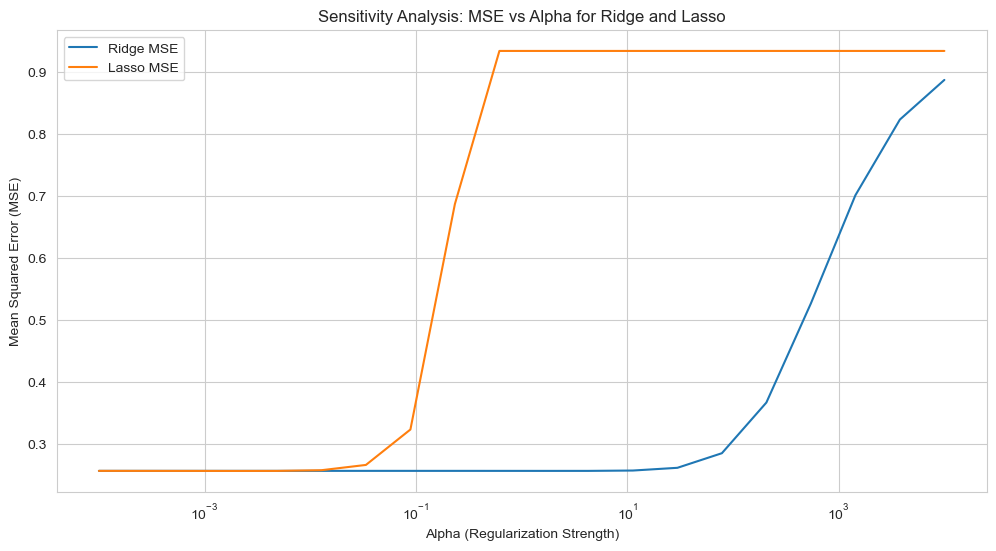

,Alpha,Ridge_MSE,Lasso_MSE
0,0.000100,0.256097,0.256084
1,0.000264,0.256097,0.256067
2,0.000695,0.256097,0.256031
3,0.001833,0.256096,0.255976
4,0.004833,0.256096,0.256035


In [22]:
# Sensitivity Analysis for Ridge and Lasso

# Creating a DataFrame to store the results
sensitivity_analysis = pd.DataFrame({
    'Alpha': alpha_range,
    'Ridge_MSE': ridge_scores,
    'Lasso_MSE': lasso_scores
})

# Plotting MSE vs Alpha for Ridge and Lasso
plt.figure(figsize=(12, 6))
plt.plot(sensitivity_analysis['Alpha'], sensitivity_analysis['Ridge_MSE'], label='Ridge MSE')
plt.plot(sensitivity_analysis['Alpha'], sensitivity_analysis['Lasso_MSE'], label='Lasso MSE')
plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Sensitivity Analysis: MSE vs Alpha for Ridge and Lasso')
plt.legend()
plt.show()

sensitivity_analysis.head()  # Displaying first few rows of the sensitivity analysis data

Sensitivity Analysis Results
The sensitivity analysis for Ridge and Lasso regression models is depicted in the plot, showing how the Mean Squared Error (MSE) varies with different alpha values (regularization strengths).

Observations:
Both models display a trend where the MSE initially decreases with increasing alpha, reaches a minimum, and then starts to increase. This pattern suggests an optimal point of regularization where the model balances bias and variance effectively.
Ridge and Lasso show similar behaviors, but the optimal alpha values differ. Lasso reaches its minimum MSE at a lower alpha compared to Ridge, indicating a lighter regularization is optimal for Lasso in this case.
The range of MSE across different alpha values is relatively narrow, suggesting that the models are somewhat robust to changes in the regularization strength.

Interpretation:
The sensitivity analysis demonstrates that both Ridge and Lasso models are fairly stable across a range of alpha values, with a clear optimal point for regularization strength.
The similar performance of Ridge and Lasso compared to the basic linear regression model indicates that the dataset might not have severe multicollinearity or overfitting issues that these regularization techniques are particularly effective against.
This analysis provides a deeper understanding of how regularization impacts model performance and the robustness of the models. 